In [2]:
import praw
reddit = praw.Reddit(client_id='sPanCFBQ8JmuGQ',
                    client_secret='PA0WbNXtuN_Bs5Svkjioy5uOiYo',
                    user_agent='saitj31')

In [3]:
headlines = set()

In [7]:
for submissions in reddit.subreddit('politics').new(limit=None):
    headlines.add(submissions.title)
    #display.clear_output()
print(len(headlines))

979


In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [13]:
sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [19]:
from pprint import pprint
pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Trump ‘compromised by the Russians’, says former member of Mueller’s team',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': -0.5423,
  'headline': 'Trump keeps telling people to vote twice, even though that’s a crime',
  'neg': 0.259,
  'neu': 0.741,
  'pos': 0.0},
 {'compound': 0.5267,
  'headline': 'Stacey Abrams’s Delusions of Grandeur',
  'neg': 0.0,
  'neu': 0.541,
  'pos': 0.459}]


In [21]:
results[6]

{'neg': 0.0,
 'neu': 1.0,
 'pos': 0.0,
 'compound': 0.0,
 'headline': 'Russian Meddling Efforts Intensifying as US Election Nears'}

In [23]:
import pandas as pd
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.000,1.000,0.000,0.0000,"Trump ‘compromised by the Russians’, says form..."
1,0.259,0.741,0.000,-0.5423,"Trump keeps telling people to vote twice, even..."
2,0.000,0.541,0.459,0.5267,Stacey Abrams’s Delusions of Grandeur
3,0.244,0.756,0.000,-0.4404,Trump hosting of large indoor rally condemned ...
4,0.390,0.610,0.000,-0.7887,Trump says he didn't want to 'create panic' ov...


In [24]:
df['label'] = 0
df.loc[df['compound'] > 0.3, 'label'] = 1
df.loc[df['compound'] < -0.3, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.000,1.000,0.000,0.0000,"Trump ‘compromised by the Russians’, says form...",0
1,0.259,0.741,0.000,-0.5423,"Trump keeps telling people to vote twice, even...",-1
2,0.000,0.541,0.459,0.5267,Stacey Abrams’s Delusions of Grandeur,1
3,0.244,0.756,0.000,-0.4404,Trump hosting of large indoor rally condemned ...,-1
4,0.390,0.610,0.000,-0.7887,Trump says he didn't want to 'create panic' ov...,-1


In [25]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

Positive headlines:

['Stacey Abrams’s Delusions of Grandeur',
 'Tester, Bullock call for action to help postal service',
 'Trump adviser: President will likely trail into Election Day, but still win',
 'Trump’s Health Department Changed CDC Reports on COVID-19 to Fit President’s Message: Report',
 'Oracle, one of Donald Trump’s favorite companies, wins TikTok deal | Ellison has raised money for Trump. Trump has called Ellison a "tremendous guy."']


In [26]:
print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)


Negative headlines:

['Trump keeps telling people to vote twice, even though that’s a crime',
 "Trump hosting of large indoor rally condemned as 'negligent homicide'",
 "Trump says he didn't want to 'create panic' over the pandemic, but stoking fear has been his trademark",
 'The GOP Is Staging Chaos On the Way To A Coup',
 'More voters classify BLM unrest as riots rather than protests: poll']


In [27]:
print(df.label.value_counts())

 0    481
-1    328
 1    170
Name: label, dtype: int64


In [28]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [29]:
tokenizer = RegexpTokenizer(r'\w+')

In [35]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [31]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [36]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 86),
 ('biden', 43),
 ('florida', 15),
 ('says', 14),
 ('help', 12),
 ('president', 12),
 ('election', 12),
 ('million', 11),
 ('joe', 11),
 ('campaign', 11),
 ('win', 10),
 ('bloomberg', 10),
 ('court', 10),
 ('nobel', 9),
 ('peace', 9),
 ('prize', 9),
 ('100', 9),
 ('supreme', 9),
 ('nomination', 8),
 ('supporters', 8)]

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

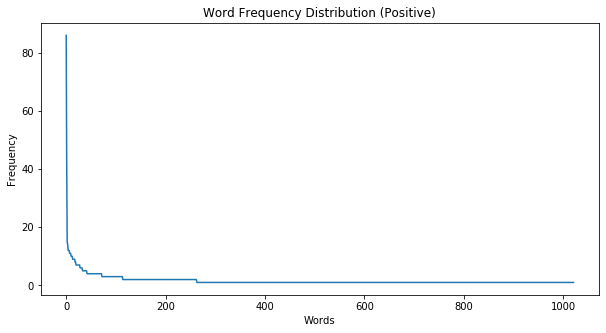

In [39]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

In [41]:
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 200),
 ('biden', 38),
 ('election', 25),
 ('rally', 22),
 ('climate', 22),
 ('woodward', 20),
 ('says', 19),
 ('president', 19),
 ('covid', 19),
 ('coronavirus', 18),
 ('u', 17),
 ('us', 17),
 ('california', 17),
 ('donald', 15),
 ('voting', 15),
 ('state', 15),
 ('change', 15),
 ('wildfires', 14),
 ('nevada', 14),
 ('voters', 13)]

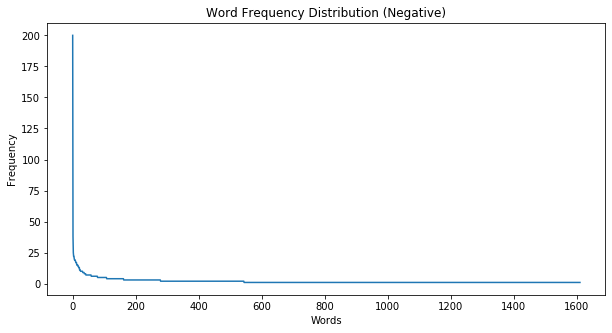

In [42]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()